In [16]:
from google.colab import drive #for mounting drive on google collab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!unzip "/content/drive/MyDrive/AI_Sentiment analysis_of_movie_reviews/archive.zip" -d "/content/drive/MyDrive/AI_Sentiment analysis_of_movie_reviews/dataset" #for unzipping the archive.zip

Archive:  /content/drive/MyDrive/AI_Sentiment analysis_of_movie_reviews/archive.zip
  inflating: /content/drive/MyDrive/AI_Sentiment analysis_of_movie_reviews/dataset/IMDB Dataset.csv  


In [81]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/drive/MyDrive/AI_Sentiment analysis_of_movie_reviews/dataset/IMDB Dataset.csv")

In [82]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [83]:
dataset.columns

Index(['review', 'sentiment'], dtype='object')

In [84]:
dataset.shape

(50000, 2)

In [85]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [86]:
dataset.isnull().sum() #gives the total number of null values present in each column

review       0
sentiment    0
dtype: int64

In [87]:
dataset.isnull().any()

review       False
sentiment    False
dtype: bool

In [88]:
dataset['sentiment'].value_counts() #give True or False if there is any null value present in any column or not respectively

positive    25000
negative    25000
Name: sentiment, dtype: int64

**Import necessary libraries**

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize, sent_tokenize

In [90]:
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from bs4 import BeautifulSoup

In [91]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
tokenizers=ToktokTokenizer() #for tokenization of data
stopwords=nltk.corpus.stopwords.words("english") #for storing stopwords(english) in variable "stopwords"

**Noise Remover**

In [93]:
def noiseremoval_text(text):
  soup=BeautifulSoup(text,"html.parser")
  text=soup.get_text()
  text=re.sub('\[[^]]*\]','',text) #This line uses the re.sub() function from the re module to perform a regular expression substitution
  return text

BeautifulSoup is a Python library that is commonly used for web scraping and extracting data from HTML or XML documents.The "html.parser" is a built-in parser provided by BeautifulSoup that is capable of parsing HTML and extracting information from it.This object(soup) allows you to access and manipulate the different elements, tags, and text within the HTML document. For more, visit https://stackabuse.com/guide-to-parsing-html-with-beautifulsoup-in-python/

In [94]:
dataset['review']=dataset['review'].apply(noiseremoval_text) #call the noiseremoval_text function on column review

<ipython-input-93-25ff8f26274f>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text,"html.parser")


In [95]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Stemming**

In [96]:
def stemmer(text):
  ps=nltk.porter.PorterStemmer()
  text=' '.join([ps.stem(word) for word in text.split()])
  return text

In [97]:
dataset['review']=dataset['review'].apply(stemmer)

In [98]:
dataset.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl production. the film techniqu i...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there' a famili where a littl boy (jake)...,negative
4,"petter mattei' ""love in the time of money"" is ...",positive


**Removing Stopwords**

In [99]:
def remove_stopwords(text):
  tokens=tokenizers.tokenize(text)
  tokens=[i.strip() for i in tokens] #strip is used to remove leading and trailing whitespaces or special characters in strings like ***Hello, Worls***
  filtoken=[i for i in tokens if i.lower() not in stopwords]
  return ' '.join(filtoken)

In [100]:
dataset['review']=dataset['review'].apply(remove_stopwords)

In [101]:
dataset.head()

,review,sentiment
0,one review ha mention watch 1 oz episod ' hook...,positive
1,wonder littl production. film techniqu veri un...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic ' famili littl boy ( jake ) think ' zomb...,negative
4,"petter mattei ' "" love time money "" visual stu...",positive


**Train Test Split**

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(dataset['review'],dataset['sentiment'],test_size=0.3,random_state=7) #This sets the random seed for reproducibility,
#ensuring that the same split is obtained each time the code is executed.
print("Length of train_data",len(X_train))
print("Length of test_data",len(X_test))

Length of train_data 35000
Length of test_data 15000


**Count Vectorizer for bag of words**

In [103]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#fit and transform train reviews
cv_train=cv.fit_transform(X_train)
#transform test reviews
cv_test=cv.transform(X_test)

It(Bag of words) provides a way to represent text documents as numerical vectors, which can be used as input to machine learning algorithms for tasks such as text classification, sentiment analysis, and information retrieval.

The fit_transform() method transforms the training data into a document-term matrix, where each row represents a document, and each column represents a word from the vocabulary. The values in the matrix indicate the frequency or count of each word in each document.

The transform() method is used to transform the test data into a document-term matrix using the vocabulary learned from the training data.
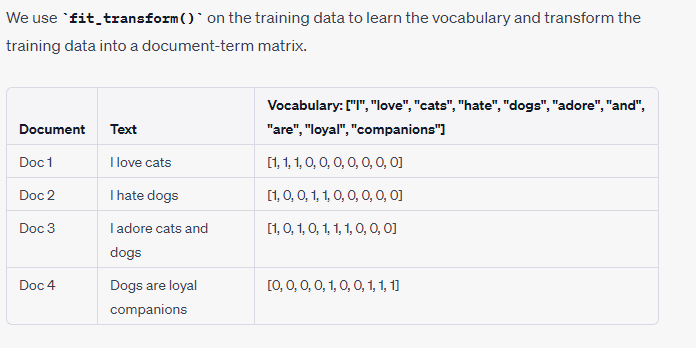
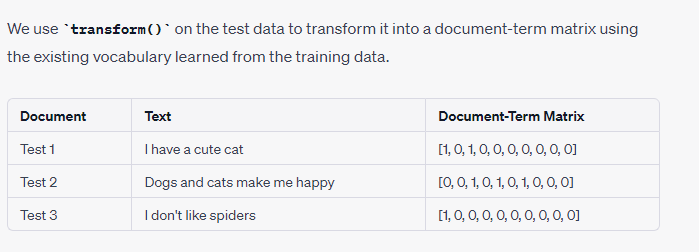


**TF-IDF**

In [109]:
tf=TfidfVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#fit and transform train reviews
tf_train=tf.fit_transform(X_train)
#transform test reviews
tf_test=tf.transform(X_test)

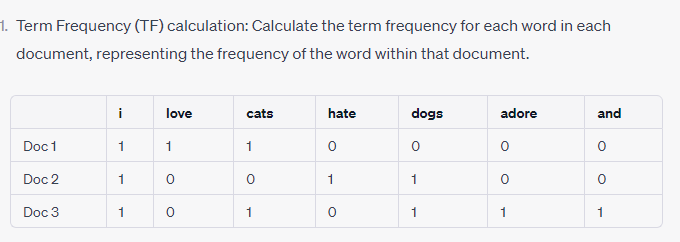
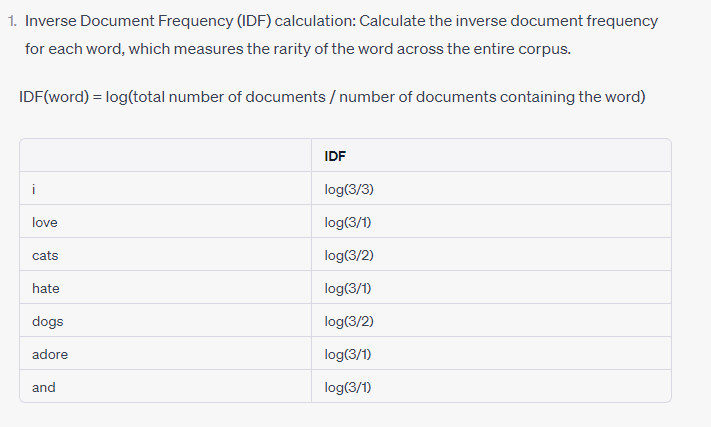
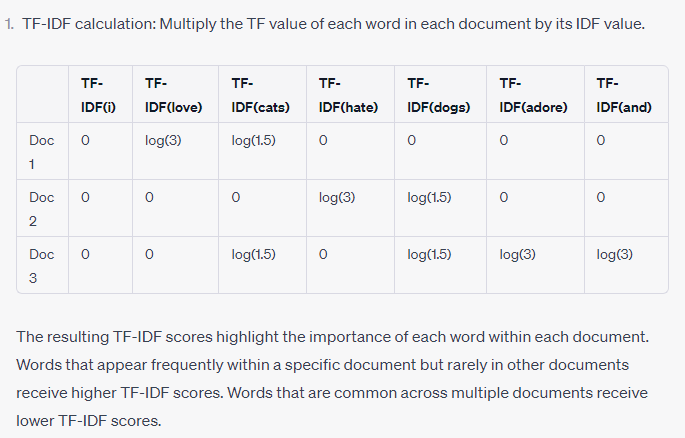

**Logistic Regression for Count Vectorizer**

In [105]:
model=LogisticRegression(max_iter=1000000)
model_cv=model.fit(cv_train,Y_train)

**Prediction**

In [106]:
predict_1 = model_cv.predict(cv_test)

**Accuracy**

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predict_1)

0.6141333333333333

**Logistic Regression for TF-IDF**

In [123]:
model=LogisticRegression(max_iter=1000)
model_tf=model.fit(tf_train,Y_train)

**Prediction**

In [124]:
predict_2 = model_tf.predict(tf_test)

**Accuracy**

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predict_2)

0.7426

In [126]:
from sklearn.metrics import f1_score #another way to check accuracy (1 is the best value and 0 is the worst)
f1_score(Y_test, predict_2, average='macro')

0.7422264678213107